In [2]:
import pandas as pd
import numpy as np

In [3]:
# 데이터 불러오기 및 필요 없는 열 제거 + na 제거
data = pd.read_excel(r'C:\Users\user0216\OneDrive - Sejong University\바탕 화면\ESG_classificaion_KG\ESG_KG_personal_project\ESG_only.xlsx')
data = data.drop(data.columns[0], axis=1)
data = data.dropna()
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

label                                               text
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.
...     ...                                                ...
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...

[60397 rows x 2 columns]

In [ ]:
'''
e_list = ['환경경영 목표','원부자재','온실가스','에너지','용수','폐기물','오염물질','환경 법','규제 위반','환경 라벨링']
s_list = ['노동','목표','다양성','양성평등','산업안전','인권','동반성장','지역사회','정보보호','사회 법','규제 위반']
g_list = ['이사회 구성','이사회 활동','주주권리','윤리경영','감사기구','지배구조 법','규제 위반']
'''

In [4]:
import re
""" 필요 없는 문자 제거 """
def clean_text(row):
    text = row['text']
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("한글 자음 모음 제거 : ", text , "\n")
    pattern = r'\([^)]*\)'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("괄호와 괄호안 글자 제거 :  " , text , "\n")
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    # print("특수기호 제거 : ", text , "\n" )
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '["7"]'
    text = re.sub(pattern=pattern, repl='', string=text)   
    text = text.strip()
    # print("양 끝 공백 제거 : ", text , "\n" )
    text = " ".join(text.split())
    # print("중간에 공백은 1개만 : ", text )
    return text

data['text_c'] = data.apply(clean_text, axis=1)
data

label                                               text  \
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.   
...     ...                                                ...   
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...   
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...   
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.   
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...   

                                                  text_c  
0      한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...  
1      기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...  
2      그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...  
3      BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...  
4                 너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다  
...                                                  ...  
60392  년 상반기에는 사랑의 집 호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑의 집 ...  
60393  중국 지역 사랑의 물 나누기 운동 년 월부터 중국부녀발전기금회 주관의 전 국가 적 ...  
60394  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...  
60395                  또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다  
60396  중앙아시아 사할린 지점 사할린 지점에서는 한인 세 노인들이 외롭게 살고 있는 브이코...  

[60397 rows x 3 columns]

In [5]:
""" 키워드 추출 from title """
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from tqdm import tqdm

kkma = Kkma()
komoran = Komoran()

data['keyword'] = ''
for i in tqdm(range(len(data))):
    nouns_list = komoran.nouns(data['text_c'][i])
    nouns_list_c = [nouns for nouns in nouns_list if len(nouns) > 1]  # 한글자는 이상한게 많아서 2글자 이상
    a = set(nouns_list_c)
    data['keyword'][i] = a
data

100%|██████████| 60397/60397 [03:33<00:00, 283.12it/s]


label                                               text  \
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.   
...     ...                                                ...   
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...   
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...   
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.   
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...   

                                                  text_c  \
0      한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1      기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2      그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3      BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4                 너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다   
...                                                  ...   
60392  년 상반기에는 사랑의 집 호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑의 집 ...   
60393  중국 지역 사랑의 물 나누기 운동 년 월부터 중국부녀발전기금회 주관의 전 국가 적 ...   
60394  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395                  또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다   
60396  중앙아시아 사할린 지점 사할린 지점에서는 한인 세 노인들이 외롭게 살고 있는 브이코...   

                                                 keyword  
0           {강화, 위협, 장기, 한편, 예상, 체계, 국제, 대응, 변화, 기후, 사회}  
1      {사업, 확대, 수요, 금융, 감소, 변화, 이행, 익스, 실행, 강화, 분야, 시...  
2                   {보호, 금융, 구축, 토대, 실현, 대응, 환경, 변화, 기후}  
3      {경영, 선도, 추진, 금융, 니다, BNK금융그룹, 미래, 지향, 전략, 환경, ...  
4                           {경영, 환경, 추진, 절감, 효율, 실천, 활동}  
...                                                  ...  
60392                {성과, 사랑, 지속, 베트남, 앞으로, 상반기, 지원, 오픈}  
60393  {공헌, 기금, 주관, 프로젝트, 사랑, 운동, 국가, 중국, 발전, 지역, 부녀,...  
60394  {정기, 아시아나항공, 사랑, 실시, 중국, 기부, 홍보물, 공항, 모금, 성금, ...  
60395                             {행사, 점퍼, 사랑, 연말연시, 후원}  
60396  {지원, 방문, 모국, 경로잔치, 무료, 개최, 항공권, 한인, 노인, 사할린, 지...  

[60397 rows x 4 columns]

In [6]:
e_label = data.loc[data['label'] == 'E']

s_label = data.loc[data['label'] == 'S']
s_label = s_label.reset_index()
s_label = s_label.drop(['index'], axis=1)

g_label = data.loc[data['label'] == 'G']
g_label = g_label.reset_index()
g_label = g_label.drop(['index'], axis=1)

([<matplotlib.axis.XTick at 0x196162c33c8>,
 [Text(0, 0, '15344'), Text(1, 0, '37980'), Text(2, 0, '7073')])

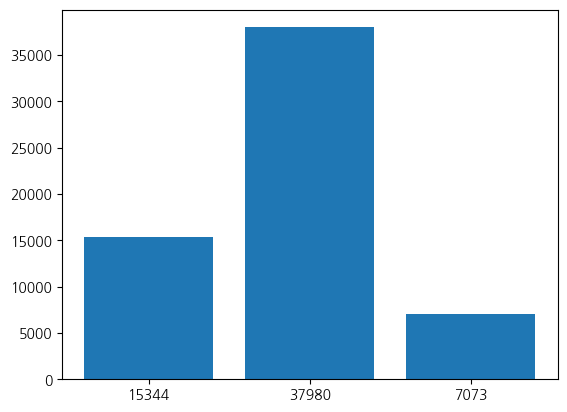

In [5]:
# 각 label별 분포
a = len(e_label)
b = len(s_label)
c = len(g_label)
length = a,b,c

import matplotlib.pyplot as plt
plt.bar(range(len(length)), length)
plt.xticks(range(len(length)), length)

문장을 다 더해서 문서로 만든 다음 tf-idf 사용해보기

In [9]:
#4분
worde = []
for i in tqdm(range(len(e_label))):
    worde.append(list(data['keyword'][i]))
doce = sum(worde)

words = []
for i in tqdm(range(len(s_label))):
    words.append(list(data['keyword'][i]))
docs = sum(words, [])
   
wordg = []
for i in tqdm(range(len(g_label))):
    wordg.append(list(data['keyword'][i]))
docg = sum(wordg, [])

100%|██████████| 15344/15344 [00:04<00:00, 3537.10it/s]


TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [8]:
docs

['한',
 '편',
 ' ',
 '장',
 '기',
 '적',
 '으',
 '로',
 ' ',
 '국',
 '제',
 ' ',
 '사',
 '회',
 '에',
 ' ',
 '큰',
 ' ',
 '위',
 '협',
 '이',
 ' ',
 '될',
 ' ',
 '것',
 '으',
 '로',
 ' ',
 '예',
 '상',
 '되',
 '는',
 ' ',
 '기',
 '후',
 '변',
 '화',
 '에',
 ' ',
 '대',
 '한',
 ' ',
 '대',
 '응',
 '체',
 '계',
 '도',
 ' ',
 '강',
 '화',
 '해',
 ' ',
 '나',
 '가',
 '고',
 ' ',
 '있',
 '습',
 '니',
 '다',
 '.',
 '기',
 '후',
 '변',
 '화',
 '의',
 ' ',
 '규',
 '제',
 ' ',
 '강',
 '화',
 '에',
 ' ',
 '따',
 '라',
 ' ',
 '투',
 '자',
 '사',
 '업',
 '들',
 '에',
 ' ',
 '대',
 '한',
 ' ',
 '리',
 '스',
 '크',
 ' ',
 '익',
 '스',
 '포',
 '저',
 '의',
 ' ',
 '변',
 '화',
 ' ',
 '투',
 '자',
 ' ',
 '수',
 '익',
 '률',
 '의',
 ' ',
 '감',
 '소',
 ' ',
 '등',
 '이',
 ' ',
 '예',
 '상',
 '되',
 '는',
 ' ',
 '가',
 '운',
 '데',
 ' ',
 'B',
 'N',
 'K',
 '금',
 '융',
 '그',
 '룹',
 '은',
 ' ',
 '저',
 '탄',
 '소',
 ' ',
 '경',
 '제',
 '로',
 '의',
 ' ',
 '이',
 '행',
 ' ',
 '및',
 ' ',
 '녹',
 '색',
 ' ',
 '금',
 '융',
 ' ',
 '서',
 '비',
 '스',
 ' ',
 '에',
 ' ',
 '대',
 '한',
 ' ',
 '소',
 '비',
 '자',
 ' ',
 '수',
 '요'

In [45]:
lyrics = ''

for line in sample['text']:
    if line == '' :
        continue
    lyrics = lyrics + line
    
lyrics = lyrics.split() 
lyrics

['한편',
 '장기적으로',
 '국제',
 '사회에',
 '큰',
 '위협이',
 '될',
 '것으로',
 '예상되는',
 '기후변화에',
 '대한',
 '대응체계도',
 '강화해',
 '나가고',
 '있습니다.기후변화의',
 '규제',
 '강화에',
 '따라',
 '투자사업들에',
 '대한',
 '리스크',
 '익스포저의',
 '변화',
 '투자',
 '수익률의',
 '감소',
 '등이',
 '예상되는',
 '가운데',
 'BNK금융그룹은',
 '저탄소',
 '경제로의',
 '이행',
 '및',
 '녹색',
 '금융',
 '서비스',
 '에',
 '대한',
 '소비자',
 '수요',
 '증가에',
 '대비하여',
 '환경경영',
 '강화',
 '친환경',
 '금융',
 '확대',
 'PFProject',
 'Financing',
 '실행시',
 '환경영향평가',
 '시행',
 '등',
 '다양한',
 '환경분야',
 '리스크',
 '관리',
 '기법을',
 '적용하는',
 '중입니다.그리고',
 '이',
 '를',
 '통해',
 '금융을',
 '통한',
 '환경보호',
 '및',
 '기후변화',
 '대응을',
 '실현하기',
 '위한',
 '토대를',
 '구축해',
 '나가고',
 '있습니다.BNK금융그룹은',
 '금융산업의',
 '미래지향적',
 '친환경',
 '경영을',
 '선도하는',
 '환경경영',
 '전략을',
 '추진하고',
 '있습',
 '니다.너지',
 '절감',
 '활동을',
 '추진함으로써',
 '효율적으로',
 '환경경영을',
 '실천하고',
 '있습니다.BNK금융그룹은',
 '에너지',
 '절약',
 '및',
 '친환경과',
 '관련된',
 '전사적',
 '캠페인을',
 '실시함으로써',
 '임직원의',
 '자발',
 '적인',
 '에너지',
 '절약과',
 '친환경',
 '문화',
 '확산에',
 '노력하고',
 '있습니다.-7년',
 '시행된',
 '에너지물자절약',
 '-7GO',
 '운동을',
 '지속하여',
 '임직원의',
 

In [47]:
counts = dict()
for word in lyrics:
   counts[word] = counts.get(word,0) + 1
counts

{'한편': 656,
 '장기적으로': 46,
 '국제': 316,
 '사회에': 185,
 '큰': 503,
 '위협이': 7,
 '될': 343,
 '것으로': 690,
 '예상되는': 43,
 '기후변화에': 112,
 '대한': 6115,
 '대응체계도': 2,
 '강화해': 190,
 '나가고': 532,
 '있습니다.기후변화의': 1,
 '규제': 298,
 '강화에': 103,
 '따라': 2335,
 '투자사업들에': 1,
 '리스크': 580,
 '익스포저의': 1,
 '변화': 146,
 '투자': 272,
 '수익률의': 2,
 '감소': 137,
 '등이': 318,
 '가운데': 208,
 'BNK금융그룹은': 73,
 '저탄소': 243,
 '경제로의': 6,
 '이행': 155,
 '및': 16120,
 '녹색': 160,
 '금융': 815,
 '서비스': 1667,
 '에': 925,
 '소비자': 279,
 '수요': 63,
 '증가에': 70,
 '대비하여': 70,
 '환경경영': 294,
 '강화': 679,
 '친환경': 1623,
 '확대': 737,
 'PFProject': 4,
 'Financing': 3,
 '실행시': 2,
 '환경영향평가': 12,
 '시행': 241,
 '등': 8375,
 '다양한': 4202,
 '환경분야': 13,
 '관리': 1418,
 '기법을': 34,
 '적용하는': 58,
 '중입니다.그리고': 2,
 '이': 2063,
 '를': 1309,
 '통해': 8454,
 '금융을': 195,
 '통한': 1662,
 '환경보호': 101,
 '기후변화': 454,
 '대응을': 200,
 '실현하기': 127,
 '위한': 6495,
 '토대를': 48,
 '구축해': 132,
 '있습니다.BNK금융그룹은': 103,
 '금융산업의': 25,
 '미래지향적': 7,
 '경영을': 275,
 '선도하는': 109,
 '전략을': 249,
 '추진하고': 827,
 '있습': 616,


In [48]:
counts_val_reverse = sorted(counts.items(), 
    reverse=True, 
    key=lambda item: item[1])

for key, value in counts_val_reverse:
    print(key, ":", value)

및 : 16120
있습니다 : 12538
위해 : 10162
수 : 9263
통해 : 8454
등 : 8375
-7년 : 8240
위한 : 6495
대한 : 6115
있는 : 5355
있으며 : 5205
-7 : 4641
다양한 : 4202
있도록 : 3651
전 : 3215
운영하고 : 2876
글로벌 : 2671
함께 : 2656
등을 : 2636
또한 : 2595
활동을 : 2542
하고 : 2540
대상으로 : 2518
따라 : 2335
-7월 : 2317
온실가스 : 2258
관련 : 2254
-7개 : 2223
총 : 2164
을 : 2128
등의 : 2089
이 : 2063
에너지 : 2041
삼성전자는 : 2021
한 : 1998
임직원 : 1984
지속적으로 : 1940
모든 : 1930
실시하고 : 1887
현대자동차는 : 1879
교육 : 1857
이를 : 1855
노력하고 : 1839
고객 : 1761
-7년부터 : 1752
지원 : 1739
LG전자는 : 1732
국내 : 1679
위하여 : 1672
서비스 : 1667
통한 : 1662
각 : 1647
사회적 : 1629
프로그램을 : 1628
친환경 : 1623
시 : 1609
환경 : 1592
중 : 1535
하는 : 1532
고 : 1523
서비스를 : 1483
지원하고 : 1483
-7년에는 : 1452
제공하고 : 1445
관리 : 1418
임직원의 : 1417
교육을 : 1415
있습니다.또한 : 1414
매년 : 1414
주요 : 1377
아니라 : 1375
의 : 1356
대해 : 1320
를 : 1309
고객의 : 1284
내 : 1278
제품 : 1256
경우 : 1253
운영 : 1246
약 : 1226
그 : 1225
대비 : 1170
사회공헌 : 1157
대한항공은 : 1157
개발 : 1150
개선 : 1137
할 : 1133
바탕으로 : 1096
특히 : 1089
협력사 : 1072
지역 : 1062
노력을 : 1053
해외 : 1052
자동차 : 1044
는

In [ ]:
from math import log
import pandas as pd

vocab = sorted(list(set(w for doc in doce for w in doc.split())))

N = len(doce)   # 문서의 수

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in doce: df += t in doc
    return log(N/(df + 1))

def tfidf(t, d):
    return tf(t, d)*idf(t)

In [ ]:
## TF
res = []
for doc in tqdm(doce):
    res.append([])
    for term in vocab:
        res[-1].append(tf(term, doc))

tf_ = pd.DataFrame(res, columns=vocab)
print(tf_)

## IDF
res = []
for term in tqdm(vocab):
    res.append(idf(term))

idf_ = pd.DataFrame(res, index=vocab, columns=["IDF"])
print(idf_)

## TF-IDF
res = []
for doc in tqdm(doce):
    res.append([])
    for term in vocab:
        res[-1].append(tfidf(term, doc))
        +
tfidf_ = pd.DataFrame(res, columns=vocab)
print(tfidf_)

tfidf_.to_csv('tfidf_sample.csv', index =False)

In [ ]:
pd.DataFrame(tfidf_)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sent=(data['text'][0], data['text'][1], data['text'][2])
      
tfidf_vectorizer=TfidfVectorizer()
tfidf_matrix=tfidf_vectorizer.fit_transform(sent)

idf=tfidf_vectorizer.idf_

dict(zip(tfidf_vectorizer.get_feature_names(),idf))

In [ ]:
doce = " ".join(e_label['text'])
docs = " ".join(s_label['text'])
docg = " ".join(g_label['text'])

In [ ]:
#특정 문서에 대해
def get_term_frequency(document, word_dict=None):
    if word_dict is None:
        word_dict = {}
    #words = document.split()

    for w in words:
        word_dict[w] = 1 + (0 if word_dict.get(w) is None else word_dict[w])

    return pd.Series(word_dict).sort_values(ascending=False)

get_term_frequency(doce)

In [ ]:
#문서들이 주어질 때 각 단어가 몇 개의 문서에 나타나는 지
def get_document_frequency(documents):
    dicts = []
    vocab = set([])
    df = {}

    for d in documents:
        tf = get_term_frequency(d)
        dicts += [tf]
        vocab = vocab | set(tf.keys())
    
    for v in list(vocab):
        df[v] = 0
        for dict_d in dicts:
            if dict_d.get(v) is not None:
                df[v] += 1

    return pd.Series(df).sort_values(ascending=False)

get_document_frequency([doce, docs])

In [ ]:
# tf-idf 37분 소요
def get_tfidf(docs):
    vocab = {}
    tfs = []
    for d in docs:
        vocab = get_term_frequency(d, vocab)
        tfs += [get_term_frequency(d)]
    df = get_document_frequency(docs)

    from operator import itemgetter
    import numpy as np

    stats = []
    for word, freq in vocab.items():
        tfidfs = []
        for idx in range(len(docs)):
            if tfs[idx].get(word) is not None:
                tfidfs += [tfs[idx][word] * np.log(len(docs) / df[word])]
            else:
                tfidfs += [0]

        stats.append((word, freq, *tfidfs, max(tfidfs)))

    return pd.DataFrame(stats, columns=('word',
                                        'frequency',
                                        'doc1',
                                        'doc2',
                                        'doc3',
                                        'max')).sort_values('max', ascending=False)

tfidf = get_tfidf([doce, docs, docg])

In [ ]:
tfidf.to_csv('tfidf.csv', index =False)

In [ ]:
tfidf = pd.read_csv(r'C:\Users\user0216\OneDrive - Sejong University\바탕 화면\ESG_classificaion_KG\ESG_KG_personal_project\sample.csv')
tfidf

In [ ]:
tfidf.drop(tfidf.index[147144:], inplace=True)
tfidf.to_csv('sample.csv', index =False)
tfidf

In [ ]:
idx = tfidf[tfidf['doc1'] == 0].index
tfidf.drop(idx , inplace=True)

In [ ]:
idx = tfidf[tfidf['doc2'] == 0].index
tfidf.drop(idx , inplace=True)

In [ ]:
idx = tfidf[tfidf['doc3'] == 0].index
tfidf.drop(idx , inplace=True)

In [ ]:
tfidf

In [6]:
data

label                                               text  \
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.   
...     ...                                                ...   
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...   
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...   
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.   
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...   

                                                  text_c  \
0      한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1      기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2      그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3      BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4                 너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다   
...                                                  ...   
60392  년 상반기에는 사랑의 집 호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑의 집 ...   
60393  중국 지역 사랑의 물 나누기 운동 년 월부터 중국부녀발전기금회 주관의 전 국가 적 ...   
60394  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395                  또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다   
60396  중앙아시아 사할린 지점 사할린 지점에서는 한인 세 노인들이 외롭게 살고 있는 브이코...   

                                                 keyword  
0           {체계, 한편, 장기, 예상, 기후, 사회, 국제, 강화, 위협, 대응, 변화}  
1      {대비, 녹색, 금융, BNK금융그룹, 감소, 소비자, 확대, 분야, 리스크, 예상...  
2                   {구축, 기후, 금융, 보호, 실현, 환경, 토대, 대응, 변화}  
3      {니다, 지향, 산업, 경영, 금융, 추진, BNK금융그룹, 친환경, 선도, 환경,...  
4                           {절감, 경영, 추진, 환경, 활동, 실천, 효율}  
...                                                  ...  
60392                {성과, 지원, 상반기, 사랑, 베트남, 오픈, 지속, 앞으로}  
60393  {주관, 사회, 기금, 중국, 프로젝트, 운동, 사랑, 공헌, 지역, 국가, 부녀,...  
60394  {성금, 정기, 지점, 중국, 실시, 사랑, 홍보물, 기부, 지역, 공항, 아시아나...  
60395                             {연말연시, 후원, 점퍼, 행사, 사랑}  
60396  {지원, 지점, 한인, 무료, 중앙아시아, 마을, 경로잔치, 사할린, 항공권, 모국...  

[60397 rows x 4 columns]

In [10]:
doce = " ".join(e_label['text'])
docs = " ".join(s_label['text'])
docg = " ".join(g_label['text'])

In [8]:
#4분
worde = []
for i in range(len(e_label)):
    worde.append(list(data['keyword'][i]))
doce = sum(worde, [])

words = []
for i in range(len(s_label)):
    words.append(list(data['keyword'][i]))
docs = sum(words, [])
   
wordg = []
for i in range(len(g_label)):
    wordg.append(list(data['keyword'][i]))
docg = sum(wordg, [])

KeyboardInterrupt: 

In [11]:
sample = pd.DataFrame([doce, docs,docg], index= ['E','S','G'], columns=['content'])
sample

content
E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
S  BNK금융그룹은 고객의 성공과 경제적 행복 실현을 위한 차별화된 고객 서비스CS를 ...
G  또한 BNK금융그룹은 희망을 주는 행복한 금융 이라는 사회적 책임 목표 아래 투명한...

In [ ]:
"""한글, 숫자, 영어 빼고 전부 제거"""
def sub_special(s):
  return re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z ]','',s)
STOP_WORDS = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','에는','니다','이다','니다']
def morph_and_stopword(s):
  token_ls = []
  #형태소 분석
  tmp = komoran.morphs(s)

  #불용어 처리
  for token in tmp:
    if token not in STOP_WORDS:
      token_ls.append(token)

In [ ]:
morph_and_stopword(sample['content'][0])

In [ ]:
sample

In [17]:
data

label                                               text  \
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.   
...     ...                                                ...   
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...   
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...   
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.   
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...   

                                                  text_c  \
0      한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...   
1      기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...   
2      그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...   
3      BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...   
4                 너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다   
...                                                  ...   
60392  년 상반기에는 사랑의 집 호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑의 집 ...   
60393  중국 지역 사랑의 물 나누기 운동 년 월부터 중국부녀발전기금회 주관의 전 국가 적 ...   
60394  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...   
60395                  또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다   
60396  중앙아시아 사할린 지점 사할린 지점에서는 한인 세 노인들이 외롭게 살고 있는 브이코...   

                                                 keyword  
0           {기후, 국제, 장기, 위협, 변화, 강화, 사회, 예상, 대응, 체계, 한편}  
1      {경제, 리스크, 경영, 친환경, 환경영향평가, 대비, 탄소, 확대, 환경, 가운데...  
2                   {금융, 기후, 구축, 변화, 토대, 보호, 실현, 대응, 환경}  
3      {BNK금융그룹, 지향, 전략, 경영, 친환경, 환경, 미래, 산업, 금융, 선도,...  
4                           {효율, 경영, 절감, 실천, 환경, 활동, 추진}  
...                                                  ...  
60392                {지속, 성과, 상반기, 오픈, 베트남, 사랑, 지원, 앞으로}  
60393  {기금, 부녀, 주관, 지역, 프로젝트, 공헌, 운동, 국가, 사회, 사랑, 중국,...  
60394  {공항, 아시아나항공, 지점, 카운터, 설치, 지역, 모금, 홍보물, 기부, 정기,...  
60395                             {행사, 후원, 연말연시, 사랑, 점퍼}  
60396  {노인, 중앙아시아, 지점, 경로잔치, 마을, 한인, 사할린, 개최, 방문, 항공권...  

[60397 rows x 4 columns]

In [3]:
sample = data[['label','text']]

In [4]:
sample

label                                               text
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.
...     ...                                                ...
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...

[60397 rows x 2 columns]

In [5]:
"""TF-IDF로 만들기"""
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sample['text'])
# 줄거리에 대해서 tf-idf 수행
print(tfidf_matrix.shape)

(60397, 150996)


In [6]:
"""코사인 유사도 구하기"""
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.07012355, 0.06669611, ..., 0.00390107, 0.0057202 ,
        0.        ],
       [0.07012355, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06669611, 0.        , 1.        , ..., 0.00461533, 0.00676753,
        0.        ],
       ...,
       [0.00390107, 0.        , 0.00461533, ..., 1.        , 0.06110583,
        0.04337714],
       [0.0057202 , 0.        , 0.00676753, ..., 0.06110583, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04337714, 0.        ,
        1.        ]])

In [7]:
"""인덱스 테이블 만들기"""
indices = pd.Series(sample.index, index=sample.text).drop_duplicates()
print(indices)

text
한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계도 강화해 나가고 있습니다.                                                                                                                                                   0
기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의 감소 등이 예상되는 가운데 BNK금융그룹은 저탄소 경제로의 이행 및 녹색 금융 서비스 에 대한 소비자 수요 증가에 대비하여 환경경영 강화 친환경 금융 확대 PFProject Financing 실행시 환경영향평가 시행 등 다양한 환경분야 리스크 관리 기법을 적용하는 중입니다.        1
그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 구축해 나가고 있습니다.                                                                                                                                                     2
BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하고 있습 니다.                                                                                                                                                          3
너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.                                                                                                                    

In [8]:
def label_REC(title, cosine_sim=cosine_sim):
    #입력한 영화로 부터 인덱스 가져오기
    idx = sample.index

    # 모든 영화에 대해서 해당 영화와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True)

    # 가장 유사한 10개의 영화를 받아옴
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개 영화의 인덱스 받아옴
    movie_indices = [i[0] for i in sim_scores]
    
    #기존에 읽어들인 데이터에서 해당 인덱스의 값들을 가져온다. 그리고 스코어 열을 추가하여 코사인 유사도도 확인할 수 있게 한다.
    result_df = sample.iloc[movie_indices].copy()
    result_df['score'] = [i[1] for i in sim_scores]
    
    # 읽어들인 데이터에서 줄거리 부분만 제거, 제목과 스코어만 보이게 함
    del result_df['content']

    # 가장 유사한 10개의 영화의 제목을 리턴
    return result_df

In [9]:
label_REC('부산은행과 경남은행은 Yes BNK Save Together을 슬로건으로 정하고 -7 에너지물자 절약 -7GO 운동을 실시하였습니다.')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
sample

label                                               text
0         E  한편 장기적으로 국제 사회에 큰 위협이 될 것으로 예상되는 기후변화에 대한 대응체계...
1         E  기후변화의 규제 강화에 따라 투자사업들에 대한 리스크 익스포저의 변화 투자 수익률의...
2         E  그리고 이 를 통해 금융을 통한 환경보호 및 기후변화 대응을 실현하기 위한 토대를 ...
3         E  BNK금융그룹은 금융산업의 미래지향적 친환경 경영을 선도하는 환경경영 전략을 추진하...
4         E            너지 절감 활동을 추진함으로써 효율적으로 환경경영을 실천하고 있습니다.
...     ...                                                ...
60392     S  -7년 상반기에는 사랑의 집 -7호를 오픈하는 성과를 올렸으며 앞으로도 베트남 사랑...
60393     S  중국 지역 사랑의 물 나누기 운동 -7년 -7월부터 중국부녀발전기금회 주관의 전 국...
60394     S  아시아나항공의 중국 전 지점 카운터 및 공항 지역에 사랑의 물 나누기 모금함과 홍보...
60395     S                 또한 연말연시 사랑의 점퍼 나누 기 행사도 후원하고 있습니다.
60396     S  중앙아시아 사할린 지점 사할린 지점에서는 한인 -7세 노인들이 외롭게 살고 있는 브...

[60397 rows x 2 columns]